## Initialization

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("talk")
%matplotlib inline

## Read in Data

In [3]:
# Read in calendar data
calender = pd.read_csv('calendar.csv')

In [5]:
# Read in listing data
listings = pd.read_csv('listings.csv')

In [7]:
# Read in reviews data
reviews = pd.read_csv('reviews.csv')

## Can you describe the vibe of each Boston neighborhood using listing descriptions?

In [ ]:
# Get top 10 neighborhood of boston in terms of
top10_neighbourhood = listings.neighbourhood_cleansed.value_counts()[0:10]

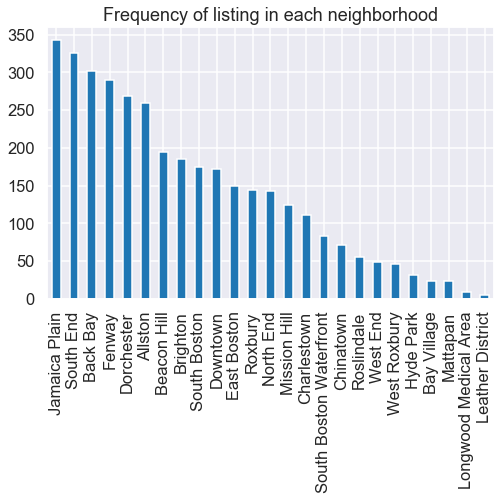

In [91]:
# Plot frequency of listing in each neighborhood
listings.neighbourhood_cleansed.value_counts().plot('bar',figsize=(8,5),
                                                    title='Frequency of listing in each neighborhood')

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Instansiate TfidfVectorizer
vec = TfidfVectorizer(stop_words='english')
X = vec.fit_transform(listings.description.fillna(''))
# Turn tfidf matrix into a DataFrame
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
# Clean up the tfidf matrix, and select the top 10 neighborhood
df = pd.concat([df[[i for i in df.columns if i.isalpha() and (i!='boston')]],listings.neighbourhood_cleansed],axis=1)\
    .groupby('neighbourhood_cleansed').sum().loc[top10_neighbourhood.index]

Jamaica Plain


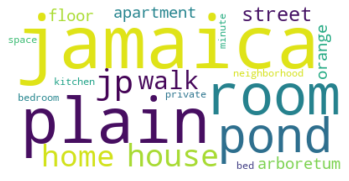

South End


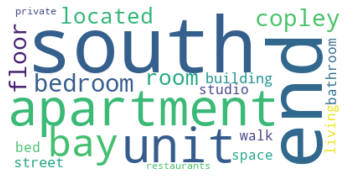

Back Bay


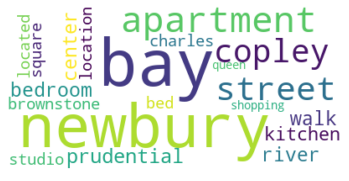

Fenway


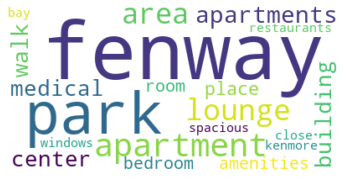

Dorchester


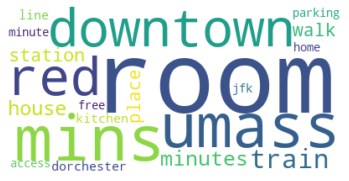

Allston


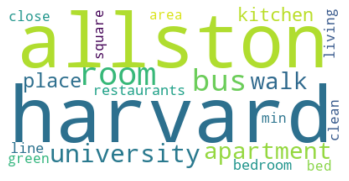

Beacon Hill


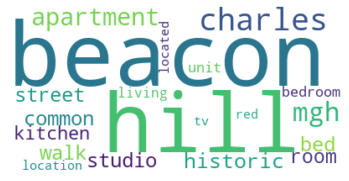

Brighton


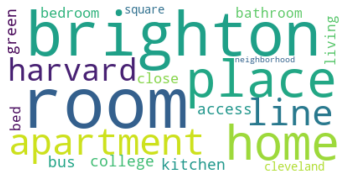

South Boston


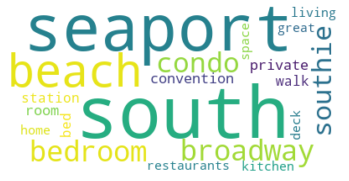

Downtown


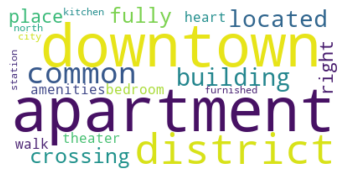

In [97]:
from wordcloud import WordCloud
for ind, row in df.iterrows():
    # Get the top 20 words
    word_frequency = row.sort_values(ascending=False)[0:20]
    # Instansiate WordCloud
    wordcloud = WordCloud(background_color="white")
    # Generate word cloud from word frequency
    wordcloud.generate_from_frequencies(frequencies=word_frequency)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    print(ind)
    plt.show()

## What are the busiest times of the year to visit Boston? By how much do prices spike? 

In [12]:
reviews.date.max(),reviews.date.min()

('2016-09-06', '2009-03-21')

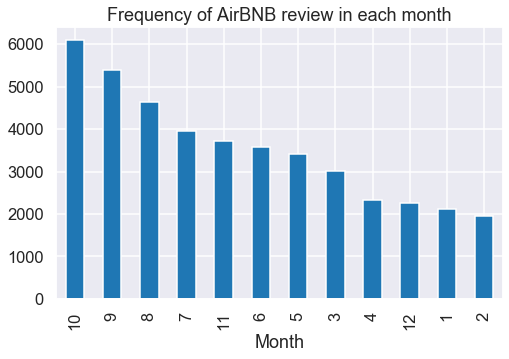

In [101]:
# Filter data to whole year, plot frequency of AirBNB review in each month
reviews\
    .assign(date = lambda data: data.date.pipe(pd.to_datetime))\
    .assign(month = lambda data: data.date.dt.month)\
    .query('date <= "2016-03-21"').month\
    .value_counts().plot('bar',figsize=(8,5),title='Frequency of AirBNB review in each month')\
    .set_xlabel('Month');

In [73]:
calender.date.min(), calender.date.max()

('2016-09-06', '2017-09-05')

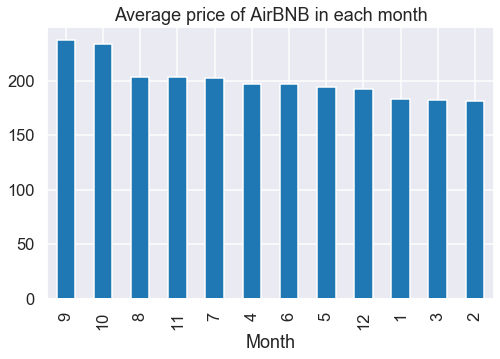

In [103]:
# Plot average price of AirBNB in each month
calender\
    .assign(month = lambda data: data.date.pipe(pd.to_datetime).dt.month)\
    .assign(price = lambda data: data.price.str.replace(r'[$,]','', regex=True).astype(float))\
    .groupby('month')\
    .price.mean()\
    .sort_values(ascending=False)\
    .plot('bar',figsize=(8,5),title='Average price of AirBNB in each month')\
    .set_xlabel('Month');

## Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?

In [70]:
listings.host_since.min(), listings.host_since.max()

('2008-11-11', '2016-09-06')

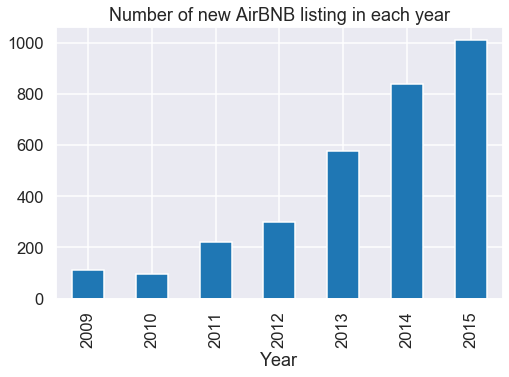

In [104]:
# Filter to whole year, plot number of new AirBNB listing in each year
listings\
    .assign(host_since = lambda data: data.host_since.pipe(pd.to_datetime))\
    .assign(year = lambda data: data.host_since.dt.year)\
    .query('(year < 2016) & (year > 2008)').year\
    .value_counts().sort_index().plot('bar',figsize=(8,5),title='Number of new AirBNB listing in each year')\
    .set_xlabel('Year');

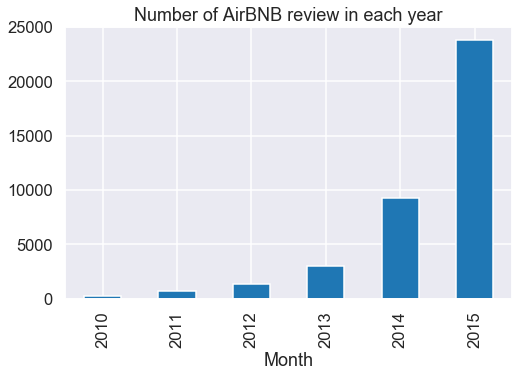

In [105]:
# Filter to whole year, plot number of AirBNB review in each year
reviews\
    .assign(date = lambda data: data.date.pipe(pd.to_datetime))\
    .assign(year = lambda data: data.date.dt.year)\
    .query('(year < 2016) & (year > 2009)').year\
    .value_counts().sort_index().plot('bar',figsize=(8,5),title='Number of AirBNB review in each year')\
    .set_xlabel('Month');